In [2]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
from numpy import random 
import matplotlib.pyplot as plt
from collections import deque
from scipy.stats import linregress

In [3]:
# tv maze show search base url (this is to search for individual shows)
base_url = "http://api.tvmaze.com/search/shows?q="

# Question 1
#Which networks, on average, have higher TV show ratings?

In [4]:
# Question 1


#calc random page numbers as sample



#URL for all primary information for every show in the database

q1URL = "http://api.tvmaze.com/shows?page="


networks = []
ratings= []
ids=[]


print("starting pull")

#this pulls every ID from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()
    for x in response:
        ids.append(x['id'])
print(f"ids done")

#this pulls every rating from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()    
    for i in response:
        ratings.append(i['rating']['average'])
        
print(f"ratings done")
#this pulls every network from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()
    for w in response:
        try:
            networks.append(w['network']['name'])
        except:
            networks.append("Null")

print(f"networks done")
print("pull completed")
print("Length check:")
print(len(networks))
print(len(ids))
print(len(ratings))
#double check that every thing lines up in the API call after you visualize
    
    
#maybe not needed but keeping code just in case:   
#associating IDs which are the only unique value in the API with network names and ratings so that we could merge the dictionaries later?    
#zip_it1 = zip(ids, networks)
#zip_it2 = zip(ids, ratings)
#dictionary1 = dict(zip_it1)
#dictionary2 = dict(zip_it2) 
   

starting pull
ids done
ratings done
networks done
pull completed
Length check:
11804
11804
11804


In [5]:
#Question 1
#create df 
quest1df = pd.DataFrame({'IDs': ids, "Networks": networks, "Ratings": ratings})
quest1df.head(50)



,IDs,Networks,Ratings
0,1,CBS,6.5
1,2,CBS,8.9
2,3,CTV Sci-Fi Channel,7.5
3,4,The CW,7.4
4,5,HBO,8.3
5,6,The CW,7.7
6,7,Showtime,8.2
7,8,FOX,6.8
8,9,ABC,7.8
9,10,NBC,8.5


In [6]:
#Summary Statistics 

mean=quest1df.groupby(["Networks"]).mean()["Ratings"]

analysis_df=pd.DataFrame({"mean network rating":mean})

# Format

analysis_df=analysis_df.round(2)

analysis_df

,mean network rating
Networks,
1+1,7.00
1-й Балтийский канал,NaN
10 Bold,NaN
10 Peach,7.50
1TV,NaN
...,...
ТВ-3,5.90
ТНТ,7.18
Україна,NaN


In [7]:
#Sort
analysis_df.sort_values(by=['mean network rating'], inplace=True, ascending=False)
analysis_df.head()

#Clean
clean_analysis_df = analysis_df.dropna(how="any")
clean_analysis_df.head()

,mean network rating
Networks,
Star TV,9.8
Smithsonian,9.5
Channel 9 MCOT HD,9.2
France 2,9.2
ESPN2,9.0


In [8]:
#Top 20 rated networks data frame

first20_networks =clean_analysis_df.head(20)

first20_networks = pd.DataFrame(first20_networks)
newfirst20_networks = first20_networks.reset_index().set_index('Networks')
newfirst20_networks

,mean network rating
Networks,
Star TV,9.80
Smithsonian,9.50
Channel 9 MCOT HD,9.20
France 2,9.20
ESPN2,9.00
Lifetime Movies,8.80
CBS Sports Network,8.80
BBC Scotland,8.80
SUN-TV,8.80


In [9]:
#Lowest rated networks Data Frame

last20_networks =clean_analysis_df.tail(20)

last20_networks = pd.DataFrame(last20_networks)
newlast20_networks = last20_networks.reset_index().set_index('Networks')
newlast20_networks

,mean network rating
Networks,
Quest,6.30
TLC,6.27
VTM,6.20
Pop,6.15
E!,6.04
France 4,6.00
AXS TV,6.00
City,6.00
ТВ-3,5.90


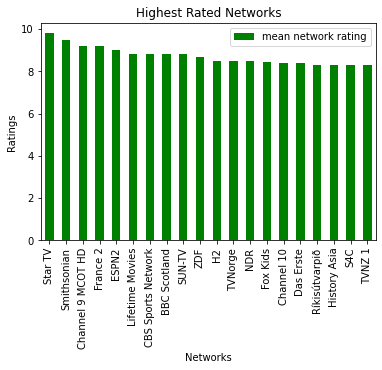

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [30]:
#Plot Highest Rated Networks

newfirst20_networks.plot(kind="bar", facecolor='green', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Networks")
plt.title("Highest Rated Networks")
plt.figure(figsize=(40,20))
plt.show()


plt.savefig("HighestRatedNetworks.png")

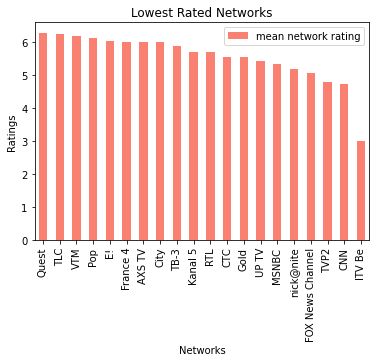

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [31]:
#Plot Lowest Rated Networks

last20_networks.plot(kind="bar", facecolor='salmon', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Networks")
plt.title("Lowest Rated Networks")
plt.figure(figsize=(40,20))
plt.show()

plt.savefig("LowestRatedNetworks.png")

In [12]:
#Question: Does the number of times a network was pulled potentially influence the ratings above?

#sorts the dataframe by value counts
networkscolumn = quest1df["Networks"]
groupedq1 = quest1df.groupby('Networks')
meanratings = groupedq1['Ratings'].mean()
meandfq1 = pd.DataFrame(meanratings)
meandfq1 = meandfq1.dropna(how="any")
meandfq1['Value Counts'] = networkscolumn.value_counts(sort=True)
sorteddf =meandfq1.sort_values(by='Value Counts', ascending=False)
sorteddf

,Ratings,Value Counts
Networks,,
BBC One,7.867442,615
ABC,7.318000,565
ITV,7.885263,531
NBC,7.410577,427
Null,7.439080,425
...,...,...
T+E,6.800000,1
Really,8.300000,1
Smithsonian,9.500000,1


In [13]:
#helps us visualize the data so that we can take out outliers
sorteddf['Value Counts'].describe()

count    219.000000
mean      45.689498
std       88.303919
min        1.000000
25%        6.000000
50%       20.000000
75%       44.000000
max      615.000000
Name: Value Counts, dtype: float64

In [14]:
#helps us visualize the data so that we can take out outliers
sorteddf['Ratings'].describe()

count    219.000000
mean       7.466734
std        0.842216
min        3.000000
25%        7.118229
50%        7.600000
75%        7.947222
max        9.800000
Name: Ratings, dtype: float64

In [15]:
#taking out ratings outliers. 3 SDs above and below the mean were taken out
sorteddfnooutlier =sorteddf.loc[(sorteddf["Ratings"]) <= 9.98]
sorteddfnooutlier =sorteddfnooutlier.loc[(sorteddf["Ratings"]) >= 4.94 ]
sorteddfnooutlier

,Ratings,Value Counts
Networks,,
BBC One,7.867442,615
ABC,7.318000,565
ITV,7.885263,531
NBC,7.410577,427
Null,7.439080,425
...,...,...
T+E,6.800000,1
Really,8.300000,1
Smithsonian,9.500000,1


In [16]:
#take out the value count outliers. 3 SDs above the mean were taken out.
sorteddfnooutlierfinal =sorteddfnooutlier.loc[(sorteddf["Value Counts"]) <= 309]

sorteddfnooutlierfinal

,Ratings,Value Counts
Networks,,
FOX,7.320968,231
Syndication,6.929545,186
Discovery Channel,7.602941,150
Tokyo MX,7.304167,136
TV Tokyo,7.628571,124
...,...,...
T+E,6.800000,1
Really,8.300000,1
Smithsonian,9.500000,1


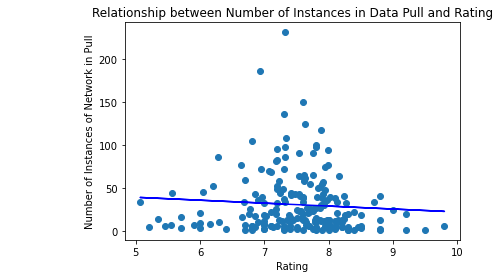

r squared: 0.00562013765262147
y = -3.42x + 56.09


<Figure size 432x288 with 0 Axes>

In [32]:
yval = sorteddfnooutlierfinal['Value Counts']
xval = sorteddfnooutlierfinal['Ratings']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)

regressionvals = xval * slope + intercept
equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(xval,yval)
plt.plot(xval, regressionvals, "b-")
plt.annotate(equation,(3,10), fontsize=15, color="black")
plt.title("Relationship between Number of Instances in Data Pull and Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Instances of Network in Pull")
plt.show()

print(f"r squared: {rvalue**2}")
print(equation)

plt.savefig("NetworkCorrelation.png")

In [18]:
print("there is a very weak correlation between the number of instances of a network in a pull and the rating")

there is a very weak correlation between the number of instances of a network in a pull and the rating


# Question 2
#Which TV Shows are the most popular?

In [19]:
#Question 2

#URL for all primary information for every show in the database

q1URL = "http://api.tvmaze.com/shows?page="



shows = []
ratings2 = []
ids2= []


print("Starting pull")

#this pulls every ID from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()
    for x in response:
        ids2.append(x['id'])
print(f"ids done")

#this pulls every show from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()    
    for i in response:
        shows.append(i['name'])
        
print(f"shows done")



#this pulls every rating from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()    
    for i in response:
        ratings2.append(i['rating']['average'])
        
print(f"ratings done")

print("length check:")   
print(len(ids2))
print(len(shows))
print(len(ratings2))
    

Starting pull
ids done
shows done
ratings done
length check:
11804
11804
11804


In [20]:
#Question 2
#create df 
quest2df = pd.DataFrame({'IDs': ids2, "Shows": shows, "Ratings": ratings2})
len(quest2df)

11804

In [21]:
quest2df.sort_values(by=['Ratings'], inplace=True, ascending=False)
quest2df.head()

,IDs,Shows,Ratings
7314,7733,Louis Theroux's Weird Weekends,9.8
7164,7580,Kara Sevda,9.8
590,607,Air Warriors,9.5
745,768,Planet Earth,9.5
450,465,Band of Brothers,9.4


In [22]:
quest2dfclean = quest2df.dropna(how="any")
quest2dfclean.head()

,IDs,Shows,Ratings
7314,7733,Louis Theroux's Weird Weekends,9.8
7164,7580,Kara Sevda,9.8
590,607,Air Warriors,9.5
745,768,Planet Earth,9.5
450,465,Band of Brothers,9.4


In [23]:
first20 =quest2dfclean.head(20)

first20 = pd.DataFrame(first20)
newfirst20 = first20.reset_index().set_index('Shows')
newfirst20_drop=newfirst20.drop(columns=['index', 'IDs'])
newfirst20_drop

,Ratings
Shows,
Louis Theroux's Weird Weekends,9.8
Kara Sevda,9.8
Air Warriors,9.5
Planet Earth,9.5
Band of Brothers,9.4
The Blue Planet,9.4
Saint Seiya,9.4
Dragnet,9.3
House Husbands,9.3


In [24]:
last20 = quest2dfclean.tail(20)

last20 = pd.DataFrame(last20)
newlast20 = last20.reset_index().set_index('Shows')
newlast20_drop=newlast20.drop(columns=['index', 'IDs'])
newlast20_drop

,Ratings
Shows,
Detroiters,4.0
Amnesia,4.0
Anderson Cooper 360°,3.8
Lavalantula,3.8
I Am Cait,3.8
Keeping Up with the Kardashians,3.7
"Neon Joe, Werewolf Hunter",3.7
Ex on the Beach,3.6
Hannity,3.5


In [25]:
type(last20)

pandas.core.frame.DataFrame

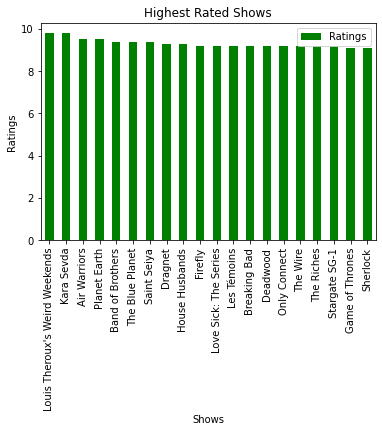

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [33]:
#Plot Highest Rated Shows

newfirst20_drop.plot(kind="bar", facecolor='green', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Shows")
plt.title("Highest Rated Shows")
plt.figure(figsize=(40,20))
plt.show()

plt.savefig("HighestRatedShows.png")

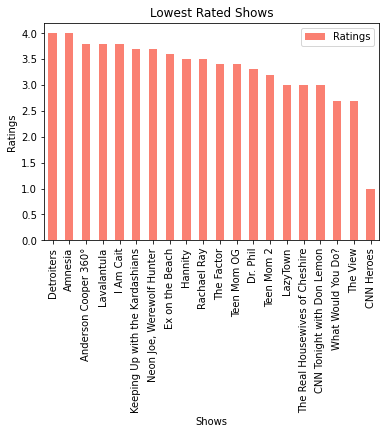

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [34]:
#Plot Lowest Rated Shows

newlast20_drop.plot(kind="bar", facecolor='salmon', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Shows")
plt.title("Lowest Rated Shows")
plt.figure(figsize=(40,20))
plt.show()

plt.savefig("LowestRatedShows.png")

In [68]:
# #figures that only include networks that have the highest number of instances from the datapull
# # showscolumn = quest2dfclean["Shows"]
# quest2dfclean = quest2dfclean.reset_index().set_index('Shows')
# groupedq2 = quest2dfclean.groupby('Shows')
# meanratings = groupedq2['Ratings'].mean()

# meandfq2 = pd.DataFrame(meanratings)

# meandfq2 = meandfq2.dropna(how="any")
# meandfq2['Value Counts'] = showscolumn.value_counts(sort=True)
# sorteddf =meandfq2.sort_values(by='Value Counts', ascending=False)
# top50q2 =sorteddf.head(50)
# top50final =top50q2.loc[(top50q2["Value Counts"]) >=2]
# top50final =top50final.sort_values(by='Ratings', ascending=False)
# top50final.head()

,Ratings,Value Counts
Shows,,
Who Do You Think You Are?,8.80,2
Doctor Who,8.70,2
Vikings,8.60,2
The Outer Limits,8.55,2
House of Cards,8.45,2


# Question 3

In [15]:
#Question 3
#Which show has the longest running season?
#URL Needed: http://api.tvmaze.com/shows/1/seasons
#end dates will need an except like the networks pull from q1


# Question 4

How does the average TV show rating change over different days of the week?

In [36]:
q1URL = "http://api.tvmaze.com/shows?page="
#TO DO: Make the page numbers randomly generated?
pages = ["0","1","2","3","4","5","6", "7", "8", "9"]

recordnum=1

days = []
ratings= []
ids=[]
listlength = len(ids)

print("starting pull")

#this pulls every ID from the first 10 pages
for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()
    for x in response:
        ids.append(x['id'])
print(f"ids done")

#this pulls every rating average from the first 10 pages
for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()    
    for i in response:
        ratings.append(i['rating']['average'])
        
print(f"ratings done")

for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()
    for w in response:
        try:
            days.append(w['schedule']['days'][0])
        except:
            days.append("No Listed Day")

print(f"days done")
print("pull completed")
print("Length check:")
print(len(days))
print(len(ids))
print(len(ratings))

starting pull
ids done
ratings done
days done
pull completed
Length check:
2385
2385
2385


In [37]:
quest4df = pd.DataFrame({'IDs': ids, "Days": days, "Ratings": ratings})
#sorting values by ratings, probably optional
quest4df.sort_values(by=['Ratings'], inplace=True, ascending=False)
quest4df.head()

,IDs,Days,Ratings
590,607,Monday,9.5
745,768,Sunday,9.5
450,465,Sunday,9.4
2039,2122,Sunday,9.3
171,180,Friday,9.2


In [38]:
#dropping any values with no ratings
quest4dfclean = quest4df.dropna(how="any")
quest4dfclean.head()

,IDs,Days,Ratings
590,607,Monday,9.5
745,768,Sunday,9.5
450,465,Sunday,9.4
2039,2122,Sunday,9.3
171,180,Friday,9.2


In [39]:
#this is also probably optional. This is counting how many times each day is in our dataframe. Important for any data interpretation we may do. Otherwise, not needed. 
dayscolumn = quest4dfclean["Days"]

q4counts =dayscolumn.value_counts(sort=True)

q4countsdf = pd.DataFrame(q4counts)

q4countsdf.head()

,Days
Sunday,288
Monday,249
Friday,208
Wednesday,205
Tuesday,199


In [40]:
#grouping by days
groupquest4dfclean = quest4dfclean.groupby('Days')
#getting descriptive data for each day
describetest=groupquest4dfclean['Ratings'].describe()
#tossing the descriptive data into a df
describedf = pd.DataFrame(describetest)
#getting rid of the extra columns in the describe function we don't need in our dataframe for the graph
describedf.drop(['count', 'std', 'min','25%', '50%','75%','max'], inplace= True, axis=1)
describedf.head()

,mean
Days,
Friday,7.650000
Monday,7.553414
No Listed Day,7.815517
Saturday,7.582609
Sunday,7.851736


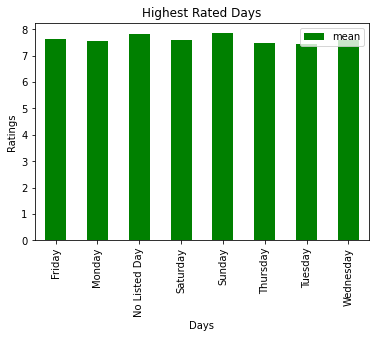

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [41]:
#Days plot

describedf.plot(kind="bar", facecolor='green', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Days")
plt.title("Highest Rated Days")
plt.figure(figsize=(40,20))
plt.show()

plt.savefig("HighestRatedDays.png")

In [42]:


# newlist= ["End","Beginning","N/A", "End", "Beginning","End", "Beginning", "Beginning"]
# groupquest4dfclean2["Week Portion"] = newlist
groupquest4dfclean2 = quest4dfclean.groupby('Days')

describetest2= groupquest4dfclean2['Ratings'].describe()
#tossing the descriptive data into a df
describedf2 = pd.DataFrame(describetest2)
describedf2.head()
#getting rid of the extra columns in the describe function we don't need in our dataframe for the graph
describedf2.drop(['count', 'std', 'min','25%', '50%','75%','max'], inplace= True, axis=1)


describenew2 = pd.DataFrame({'Mean': describedf2['mean'] , 'Week Portion':["End","Beginning","N/A", "End", "Beginning","End", "Beginning", "Beginning"]})
describenew2 = describenew2.reset_index().set_index('Week Portion')
describenew2.head()


,Days,Mean
Week Portion,,
End,Friday,7.650000
Beginning,Monday,7.553414
N/A,No Listed Day,7.815517
End,Saturday,7.582609
Beginning,Sunday,7.851736


In [43]:
describenew3 = pd.DataFrame({'Mean': describenew2['Mean']})
describenew3 = describenew3.groupby('Week Portion')
meanweekgroups =describenew3.mean()
meanweekgroups = meanweekgroups["Beginning":"End"]
meanweekgroups.head()
# meanweekgroups = meanweekgroups.drop(meanweekgroups == 'N/A', inplace=True)

,Mean
Week Portion,
Beginning,7.611641
End,7.575974


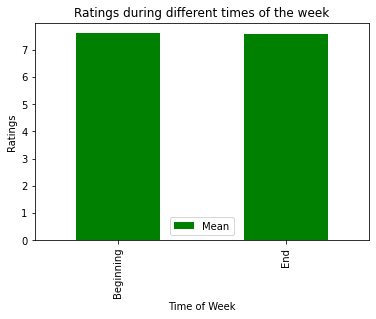

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [45]:

meanweekgroups.plot(kind="bar", facecolor='green', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Time of Week")
plt.title("Ratings during different times of the week")
plt.figure(figsize=(40,20))
plt.show()

plt.savefig("RatingsDuringWeek.png")